# Gamma1

## Alexandra Higley

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from pylab import *
from math import e
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
from scipy import stats
from scipy.stats import norm

In [2]:
channel1, intensity1, channel2, intensity2, channel3, intensity3, channel4, intensity4, channel5, intensity5, channel6, intensity6 = loadtxt('shitbrick1.dat',unpack=True,usecols=(0,1,2,3,4,5,6,7,8,9,10,11))

channel1, intensity1 --> background 1

channel2, intensity2 --> background 2

channel3, intensity3 --> Cs 1

channel4, intensity4 --> Cs 2

channel5, intensity5 --> Co 1

channel6, intensity6 --> Co 2

In [3]:
b1_t = 1201 #s
b2_t = 1201
Cs1_t = 361
Cs2_t = 361
Co1_t = 361
Co2_t = 361

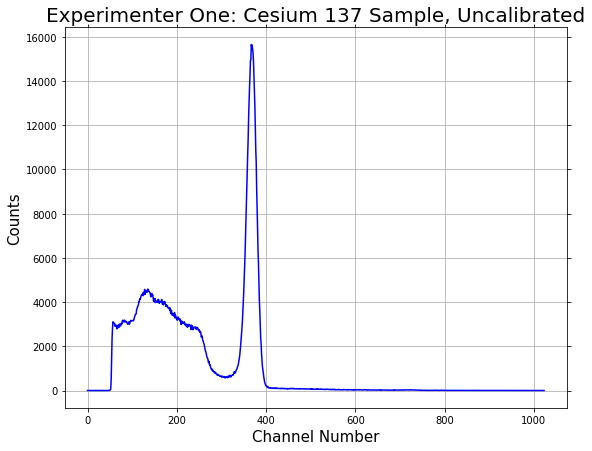

In [4]:
fig1,ax1 =plt.subplots(figsize=(9,7))

ax1.plot(channel3, intensity3, color = "blue")

ax1.set_xlabel('Channel Number',fontsize=15)
ax1.set_ylabel('Counts',fontsize=15)

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)
ax1.grid()

ax1.set_title("Experimenter One: Cesium 137 Sample, Uncalibrated", fontsize = 20)

plt.show()

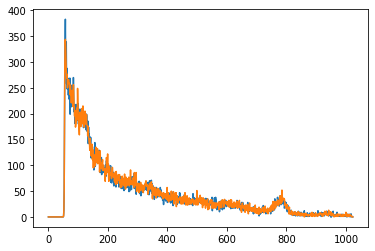

In [5]:
plt.plot(channel1,intensity1);
plt.plot(channel2,intensity2);

## Subtracting Background

In [6]:
Rtot1 = (intensity3/Cs1_t)
Rbg1 = (intensity1/b1_t)
Rsc1  = Rtot1 - Rbg1
Cs1 = Rsc1*Cs1_t

Rtot2 = (intensity4/Cs2_t)
Rbg2 = (intensity2/b2_t)
Rsc2  = Rtot2 - Rbg2
Cs2 = Rsc2*Cs2_t

Rtot3 = (intensity5/Co1_t)
Rbg3 = (intensity1/b1_t)
Rsc3  = Rtot3 - Rbg3
Co1 = Rsc3*Co1_t

Rtot4 = (intensity6/Co2_t)
Rbg4 = (intensity2/b2_t)
Rsc4  = Rtot4 - Rbg4
Co2 = Rsc4*Co2_t

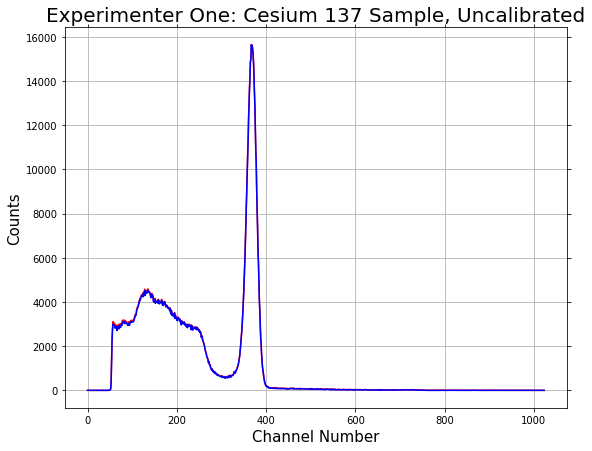

In [7]:
fig2,ax2 =plt.subplots(figsize=(9,7))

ax2.plot(channel3, intensity3, color = "red")
ax2.plot(channel3, Cs1, color = "blue")

ax2.set_xlabel('Channel Number',fontsize=15)
ax2.set_ylabel('Counts',fontsize=15)

ax2.tick_params(axis='both',which='minor',direction='in')
ax2.tick_params(top=True,right=True)
ax2.tick_params(which='minor',top=True,right=True)
ax2.grid()

ax2.set_title("Experimenter One: Cesium 137 Sample, Uncalibrated", fontsize = 20)

plt.show()

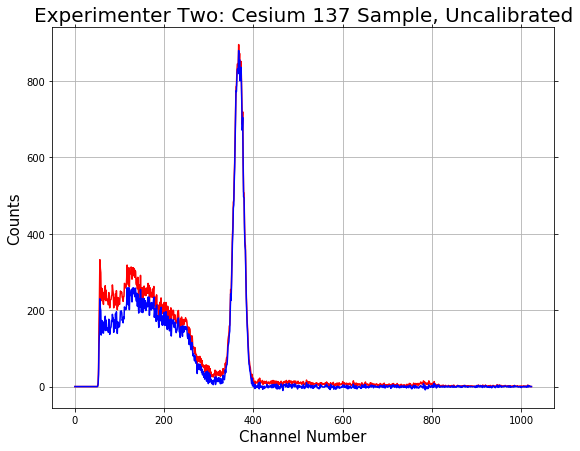

In [8]:
fig3,ax3 =plt.subplots(figsize=(9,7))

ax3.plot(channel4, intensity4, color = "red")
ax3.plot(channel4, Cs2, color = "blue")

ax3.set_xlabel('Channel Number',fontsize=15)
ax3.set_ylabel('Counts',fontsize=15)

ax3.tick_params(axis='both',which='minor',direction='in')
ax3.tick_params(top=True,right=True)
ax3.tick_params(which='minor',top=True,right=True)
ax3.grid()

ax3.set_title("Experimenter Two: Cesium 137 Sample, Uncalibrated", fontsize = 20)

plt.show()

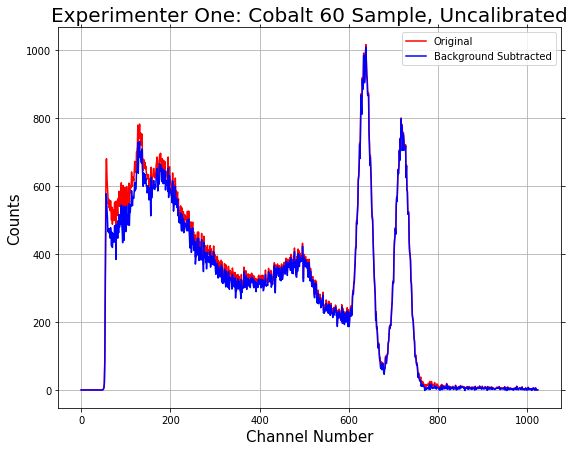

In [9]:
fig4,ax4 =plt.subplots(figsize=(9,7))

ax4.plot(channel5, intensity5, color = "red",label="Original")
ax4.plot(channel5, Co1, color = "blue",label="Background Subtracted")

ax4.set_xlabel('Channel Number',fontsize=15)
ax4.set_ylabel('Counts',fontsize=15)

ax4.tick_params(axis='both',which='minor',direction='in')
ax4.tick_params(top=True,right=True)
ax4.tick_params(which='minor',top=True,right=True)
ax4.grid()
plt.legend()

ax4.set_title("Experimenter One: Cobalt 60 Sample, Uncalibrated", fontsize = 20)

plt.show()

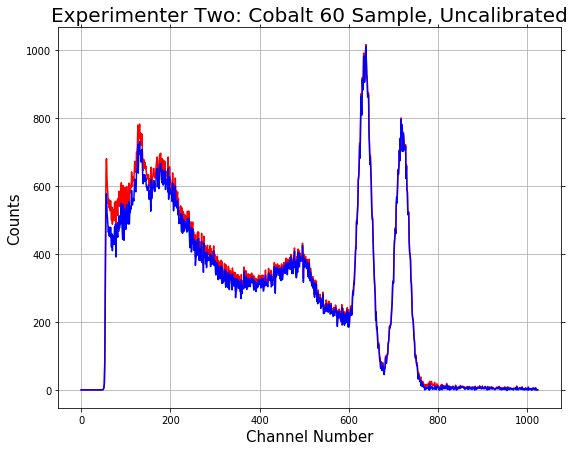

In [10]:
fig5,ax5 =plt.subplots(figsize=(9,7))

ax5.plot(channel6, intensity6, color = "red")
ax5.plot(channel6, Co2, color = "blue")

ax5.set_xlabel('Channel Number',fontsize=15)
ax5.set_ylabel('Counts',fontsize=15)

ax5.tick_params(axis='both',which='minor',direction='in')
ax5.tick_params(top=True,right=True)
ax5.tick_params(which='minor',top=True,right=True)
ax5.grid()

ax5.set_title("Experimenter Two: Cobalt 60 Sample, Uncalibrated", fontsize = 20)

plt.show()

## Calibrating for Cs Experimenter One

In [11]:
def line1(x,a1,mu,sig,c):
    y1 = 1 + a1*e**((-(x-mu)**2)/(2*sig**2))+c
    return y1

In [12]:
loc1 = np.where((channel3 >= 330 ) & (channel3 <= 410))
peak_c = channel3[loc1] 
peak_i = Cs1[loc1]

In [13]:
gg = np.mean(peak_c)
sd = np.std(peak_c)

p1= np.array([1,gg,sd,0])
coeff1, covar_matrix1 = curve_fit(line1, peak_c, peak_i,p0=p1)
xarr1=np.linspace(np.min(peak_c),np.max(peak_c),1000)
yarr1=line1(xarr1,*coeff1)

cent1 = round(coeff1[1], 3)
print("The center is at ",cent1)

The center is at  367.775


In [14]:
yc1 = (0,16500)
xc1 = (cent1, cent1)

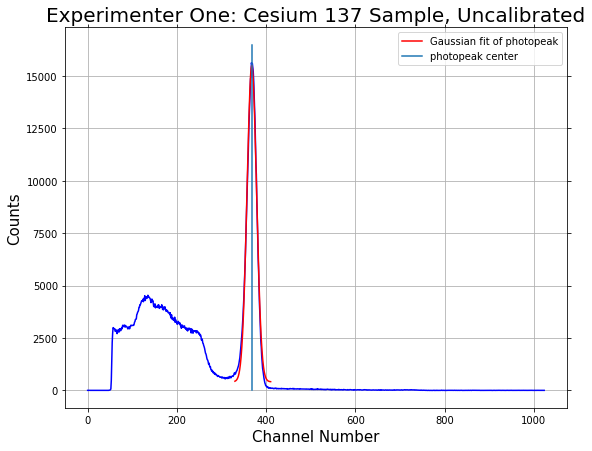

In [15]:
fig6,ax6 =plt.subplots(figsize=(9,7))

ax6.plot(channel3, Cs1, color = "blue")
ax6.plot(xarr1, yarr1, color = "red",label="Gaussian fit of photopeak")
ax6.plot(xc1, yc1, label = "photopeak center")

ax6.set_xlabel('Channel Number',fontsize=15)
ax6.set_ylabel('Counts',fontsize=15)

ax6.tick_params(axis='both',which='minor',direction='in')
ax6.tick_params(top=True,right=True)
ax6.tick_params(which='minor',top=True,right=True)
ax6.grid()

ax6.set_title("Experimenter One: Cesium 137 Sample, Uncalibrated", fontsize = 20)

plt.legend()
plt.show()

In [16]:
kev1 = 661.6
zero1 = channel3 - cent1
cal1 = zero1 + kev1

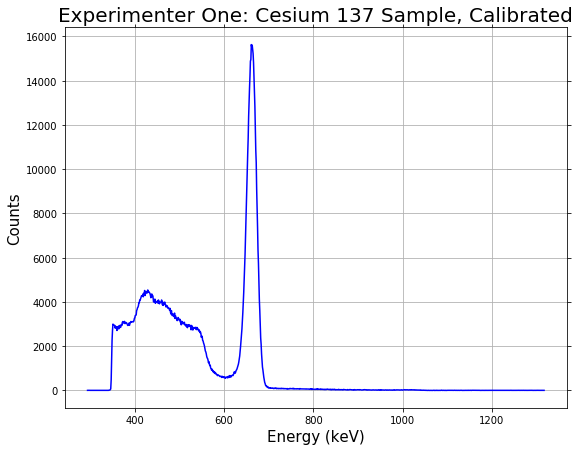

In [17]:
fig3,ax3 = plt.subplots(figsize=(9,7))

ax3.plot(cal1, Cs1, color = "blue")

ax3.set_xlabel('Energy (keV)',fontsize=15)
ax3.set_ylabel('Counts',fontsize=15)

ax3.tick_params(axis='both',which='minor',direction='in')
ax3.tick_params(top=True,right=True)
ax3.tick_params(which='minor',top=True,right=True)
ax3.grid()

ax3.set_title("Experimenter One: Cesium 137 Sample, Calibrated", fontsize = 20)

plt.show()

## Calibrating for Cs Experimenter Two

In [18]:
loc2 = np.where((channel4 >= 320 ) & (channel4 <= 410))
peak_c2 = channel4[loc2]
peak_i2 = Cs2[loc2]

In [19]:
gg2 = np.mean(peak_c2)
sd2 = np.std(peak_c2)

p2= np.array([1,gg2,sd2,0])
coeff2, covar_matrix2 = curve_fit(line1, peak_c2, peak_i2,p0=p2)
xarr2=np.linspace(np.min(peak_c2),np.max(peak_c2),1000)
yarr2=line1(xarr2,*coeff2)

cent2 = round(coeff1[1], 3)
print("The center is at ",cent2)

The center is at  367.775


In [20]:
yc2 = (0,900)
xc2 = (cent2, cent2)

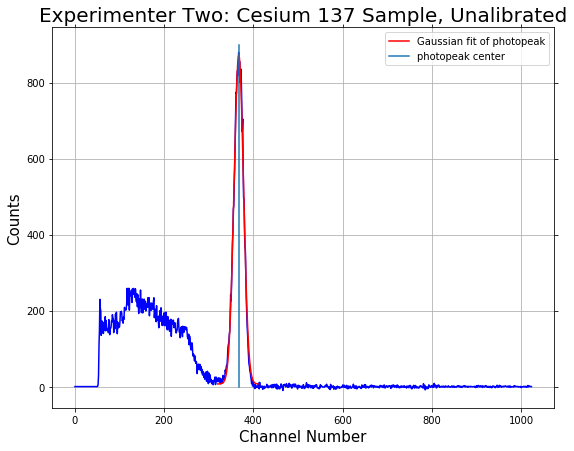

In [21]:
fig6,ax6 =plt.subplots(figsize=(9,7))

ax6.plot(channel4, Cs2, color = "blue")
ax6.plot(xarr2, yarr2, color = "red",label="Gaussian fit of photopeak")
ax6.plot(xc2, yc2, label = "photopeak center")

ax6.set_xlabel('Channel Number',fontsize=15)
ax6.set_ylabel('Counts',fontsize=15)

ax6.tick_params(axis='both',which='minor',direction='in')
ax6.tick_params(top=True,right=True)
ax6.tick_params(which='minor',top=True,right=True)
ax6.grid()

ax6.set_title("Experimenter Two: Cesium 137 Sample, Unalibrated", fontsize = 20)

plt.legend()
plt.show()

In [22]:
kev2 = 661.6
zero2 = channel4 - cent2
cal2 = zero2 + kev2

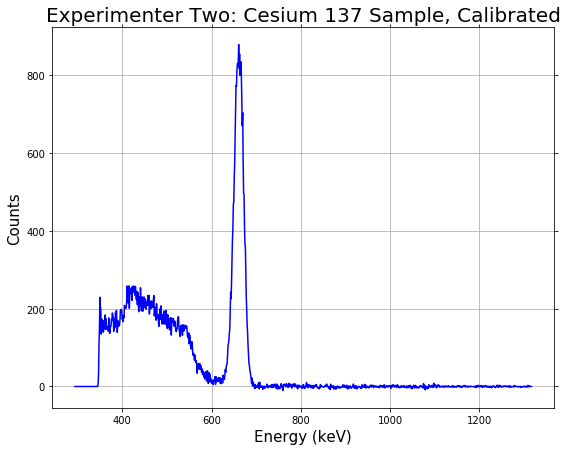

In [23]:
fig3,ax3 = plt.subplots(figsize=(9,7))

ax3.plot(cal2, Cs2, color = "blue")

ax3.set_xlabel('Energy (keV)',fontsize=15)
ax3.set_ylabel('Counts',fontsize=15)

ax3.tick_params(axis='both',which='minor',direction='in')
ax3.tick_params(top=True,right=True)
ax3.tick_params(which='minor',top=True,right=True)
ax3.grid()

ax3.set_title("Experimenter Two: Cesium 137 Sample, Calibrated", fontsize = 20)

plt.show()

## Calibrating for Co Experimenter One

In [24]:
#First Photopeak
loc3a = np.where((channel5 >= 580 ) & (channel5 <= 680))
peak_c3a = channel5[loc3a] 
peak_i3a = Co1[loc3a]

#Second Photopeak
loc3b = np.where((channel5 >= 670 ) & (channel5 <= 800))
peak_c3b = channel5[loc3b] 
peak_i3b = Co1[loc3b]

In [25]:
gg3a = np.mean(peak_c3a)
sd3a = np.std(peak_c3a)

gg3b = np.mean(peak_c3b)
sd3b = np.std(peak_c3b)

p3a= np.array([500,gg3a,sd3a,0])
coeff3a, covar_matrix3a = curve_fit(line1, peak_c3a, peak_i3a,p0=p3a)
xarr3a=np.linspace(np.min(peak_c3a),np.max(peak_c3a),1000)
yarr3a=line1(xarr3a,*coeff3a)

p3b= np.array([800,gg3b,sd3b,0])
coeff3b, covar_matrix3b = curve_fit(line1, peak_c3b, peak_i3b,p0=p3b)
xarr3b=np.linspace(np.min(peak_c3b),np.max(peak_c3b),1000)
yarr3b=line1(xarr3b,*coeff3b)

cent3a = round(coeff3a[1], 3)
print("The center is at ",cent3a)

cent3b = round(coeff3b[1], 3)
print("The center is at ",cent3b)

The center is at  635.151
The center is at  719.067


In [26]:
yc3a = (0,1050)
xc3a = (cent3a, cent3a)

yc3b = (0,850)
xc3b = (cent3b, cent3b)

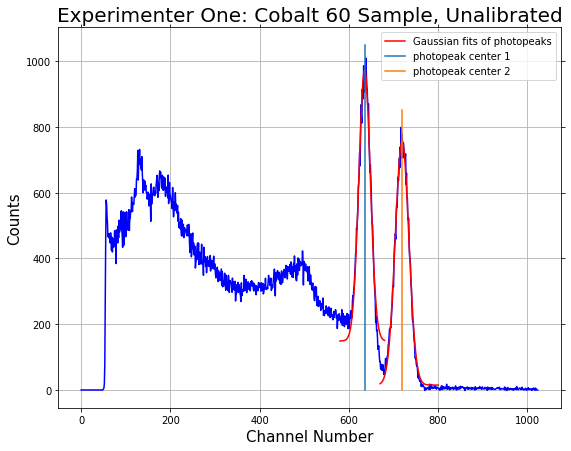

In [27]:
fig6,ax6 =plt.subplots(figsize=(9,7))

ax6.plot(channel5, Co1, color = "blue")
ax6.plot(xarr3a, yarr3a, color = "red",label="Gaussian fits of photopeaks")
ax6.plot(xarr3b, yarr3b, color = "red")
ax6.plot(xc3a, yc3a, label = "photopeak center 1")
ax6.plot(xc3b, yc3b, label = "photopeak center 2")

ax6.set_xlabel('Channel Number',fontsize=15)
ax6.set_ylabel('Counts',fontsize=15)

ax6.tick_params(axis='both',which='minor',direction='in')
ax6.tick_params(top=True,right=True)
ax6.tick_params(which='minor',top=True,right=True)
ax6.grid()

ax6.set_title("Experimenter One: Cobalt 60 Sample, Unalibrated", fontsize = 20)

plt.legend()
plt.show()

In [28]:
#two point callibration 

kev3a = 1173.2
zero3a = channel5 - cent3a
cal3a = zero3a + kev3a

kev3b = 1332.5
zero3b = channel5 - cent3b
cal3b = zero3b + kev3b

rr3 = cent3b-cent3a
ref3 = kev3b - kev3a

cal3 = (((channel5 - cent3a) * ref3) / rr3) + kev3a

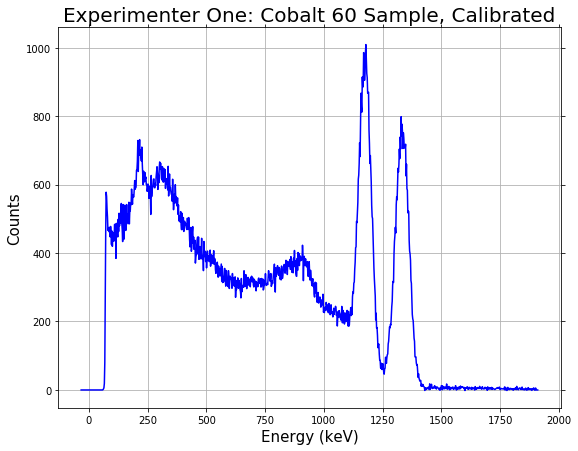

In [29]:
fig3,ax3 = plt.subplots(figsize=(9,7))

#ax3.plot(cal3a, Co1, color = "slateblue")
#ax3.plot(cal3b, Co1, color = "lightblue")
ax3.plot(cal3, Co1, color = "blue")


ax3.set_xlabel('Energy (keV)',fontsize=15)
ax3.set_ylabel('Counts',fontsize=15)

ax3.tick_params(axis='both',which='minor',direction='in')
ax3.tick_params(top=True,right=True)
ax3.tick_params(which='minor',top=True,right=True)
ax3.grid()

ax3.set_title("Experimenter One: Cobalt 60 Sample, Calibrated", fontsize = 20)

plt.show()

## Calibrating for Co Experimenter Two

In [30]:
#First Photopeak
loc4a = np.where((channel6 >= 580 ) & (channel6 <= 680))
peak_c4a = channel6[loc4a] 
peak_i4a = Co2[loc4a]

#Second Photopeak
loc4b = np.where((channel6 >= 670 ) & (channel6 <= 800))
peak_c4b = channel6[loc4b] 
peak_i4b = Co2[loc4b]

In [31]:
gg4a = np.mean(peak_c4a)
sd4a = np.std(peak_c4a)

gg4b = np.mean(peak_c4b)
sd4b = np.std(peak_c4b)

p4a= np.array([500,gg4a,sd4a,0])
coeff4a, covar_matrix4a = curve_fit(line1, peak_c4a, peak_i4a,p0=p4a)
xarr4a=np.linspace(np.min(peak_c4a),np.max(peak_c4a),1000)
yarr4a=line1(xarr4a,*coeff4a)

p4b= np.array([800,gg4b,sd4b,0])
coeff4b, covar_matrix4b = curve_fit(line1, peak_c4b, peak_i4b,p0=p4b)
xarr4b=np.linspace(np.min(peak_c4b),np.max(peak_c4b),1000)
yarr4b=line1(xarr4b,*coeff4b)

cent4a = round(coeff4a[1], 3)
print("The center is at ",cent4a)

cent4b = round(coeff4b[1], 3)
print("The center is at ",cent4b)

The center is at  635.167
The center is at  719.069


In [32]:
yc4a = (0,1050)
xc4a = (cent4a, cent4a)

yc4b = (0,850)
xc4b = (cent4b, cent4b)

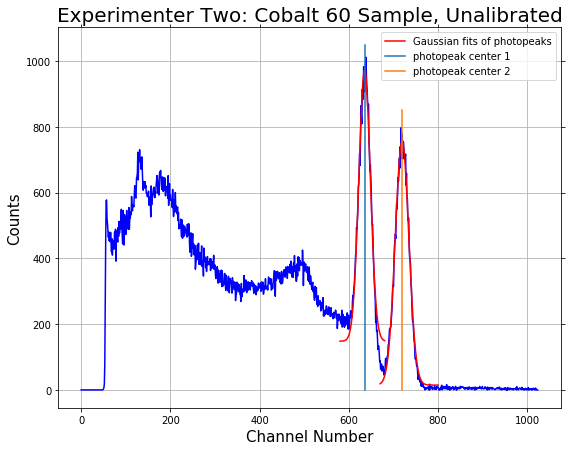

In [33]:
fig6,ax6 =plt.subplots(figsize=(9,7))

ax6.plot(channel6, Co2, color = "blue")
ax6.plot(xarr4a, yarr4a, color = "red",label="Gaussian fits of photopeaks")
ax6.plot(xarr4b, yarr4b, color = "red")
ax6.plot(xc4a, yc4a, label = "photopeak center 1")
ax6.plot(xc4b, yc4b, label = "photopeak center 2")

ax6.set_xlabel('Channel Number',fontsize=15)
ax6.set_ylabel('Counts',fontsize=15)

ax6.tick_params(axis='both',which='minor',direction='in')
ax6.tick_params(top=True,right=True)
ax6.tick_params(which='minor',top=True,right=True)
ax6.grid()

ax6.set_title("Experimenter Two: Cobalt 60 Sample, Unalibrated", fontsize = 20)

plt.legend()
plt.show()

In [34]:
#two point callibration 

kev4a = 1173.2
zero4a = channel6 - cent4a
cal4a = zero4a + kev4a

kev4b = 1332.5
zero4b = channel6 - cent4b
cal4b = zero4b + kev4b

rr4 = cent4b-cent4a
ref4 = kev4b - kev4a

cal4 = (((channel6 - cent4a) * ref4) / rr4) + kev4a

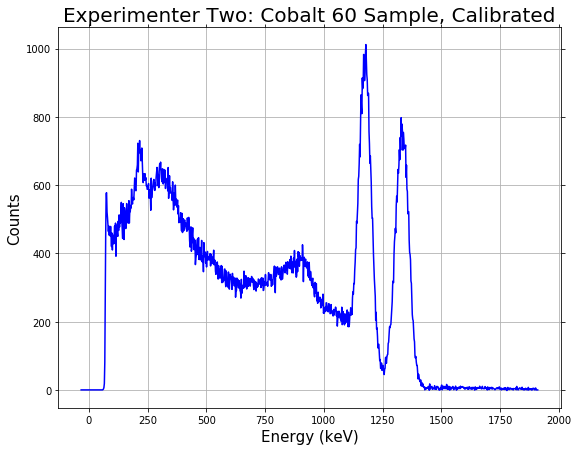

In [35]:
fig3,ax3 = plt.subplots(figsize=(9,7))

#ax3.plot(cal4a, Co2, color = "slateblue")
#ax3.plot(cal4b, Co2, color = "lightblue")
ax3.plot(cal4, Co2, color = "blue")


ax3.set_xlabel('Energy (keV)',fontsize=15)
ax3.set_ylabel('Counts',fontsize=15)

ax3.tick_params(axis='both',which='minor',direction='in')
ax3.tick_params(top=True,right=True)
ax3.tick_params(which='minor',top=True,right=True)
ax3.grid()

ax3.set_title("Experimenter Two: Cobalt 60 Sample, Calibrated", fontsize = 20)

plt.show()

## Fit for Experimenter One: Cesium 137

In [36]:
loc_cs1 = np.where((cal1 >= 350 ) & (cal1 <= 1300))

loc_cs1a = np.where((cal1 >= 380 ) & (cal1 <= 440))
loc_cs1b = np.where((cal1 >= 525 ) & (cal1 <= 600))
loc_cs1c = np.where((cal1 >= 430 ) & (cal1 <= 535))
loc_cs1d = np.where((cal1 >= 600 ) & (cal1 <= 730))

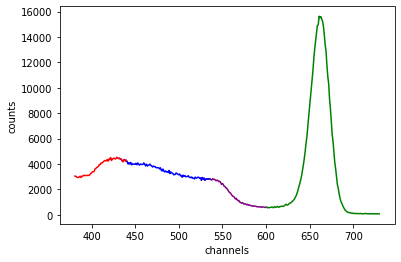

In [37]:
peakc_cs1 = cal1[loc_cs1] 
peaki_cs1 = Cs1[loc_cs1]

peakc_cs1a = cal1[loc_cs1a] 
peaki_cs1a = Cs1[loc_cs1a]

peakc_cs1b = cal1[loc_cs1b] 
peaki_cs1b = Cs1[loc_cs1b]

peakc_cs1c = cal1[loc_cs1c] 
peaki_cs1c = Cs1[loc_cs1c]

peakc_cs1d = cal1[loc_cs1d] 
peaki_cs1d = Cs1[loc_cs1d]


#plt.plot(peakc_cs1,peaki_cs1,color="black");
plt.plot(peakc_cs1b,peaki_cs1b,color="purple");
plt.plot(peakc_cs1c,peaki_cs1c,color="blue");
plt.plot(peakc_cs1d,peaki_cs1d,color="green");
plt.plot(peakc_cs1a,peaki_cs1a,color="red");

plt.xlabel('channels');
plt.ylabel('counts');

In [38]:
def line2(x,a,b):
    y2 = a*(b**x)
    return y2

In [39]:
def line4(x,b):
    y2 = (b**x)
    return y2

The center is 427.094 keV


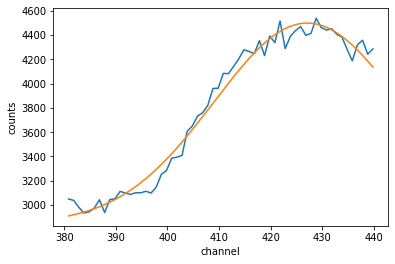

In [40]:
mcs1a = np.mean(peakc_cs1a)
sd3cs1a = np.std(peakc_cs1a)

pcs1a= np.array([4000,mcs1a,sd3cs1a,1000])
coeffcs1a, covar_matrixcs1a = curve_fit(line1, peakc_cs1a, peaki_cs1a,p0=pcs1a)
xarrcs1a=np.linspace(np.min(peakc_cs1a),np.max(peakc_cs1a),2000)
yarrcs1a=line1(xarrcs1a,*coeffcs1a)

#plt.plot(peakc_cs1,peaki_cs1,color="blue");
plt.plot(peakc_cs1a,peaki_cs1a)
plt.plot(xarrcs1a,yarrcs1a)
plt.xlabel('channel');
plt.ylabel('counts');
print("The center is",round(coeffcs1a[1],3),"keV")

The center is 535.189 keV


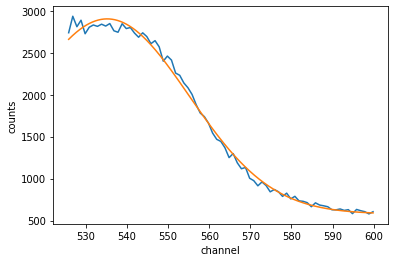

In [41]:
mcs1b = np.mean(peakc_cs1b)
sd3cs1b = np.std(peakc_cs1b)

pcs1b= np.array([4000,mcs1b,sd3cs1b,1000])
coeffcs1b, covar_matrixcs1b = curve_fit(line1, peakc_cs1b, peaki_cs1b,p0=pcs1b)
xarrcs1b=np.linspace(np.min(peakc_cs1b),np.max(peakc_cs1b),2000)
yarrcs1b=line1(xarrcs1b,*coeffcs1b)

#plt.plot(peakc_cs1,peaki_cs1,color="blue");
plt.plot(peakc_cs1b,peaki_cs1b)
plt.plot(xarrcs1b,yarrcs1b)
plt.xlabel('channel');
plt.ylabel('counts');
print("The center is",round(coeffcs1b[1],3),"keV")

/Users/alexh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


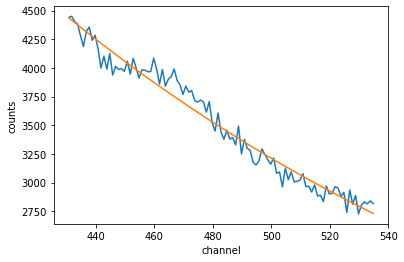

In [42]:
mcs1c = np.mean(peakc_cs1c)
sd3cs1c = np.std(peakc_cs1c)

psom = np.array([1,1])
coeffcs1c, covar_matrixcs1c = curve_fit(line2, peakc_cs1c, peaki_cs1c,p0=psom)
xarrcs1c=np.linspace(np.min(peakc_cs1c),np.max(peakc_cs1c),2000)
yarrcs1c=line2(xarrcs1c,*coeffcs1c)

#plt.plot(peakc_cs1,peaki_cs1,color="blue");
plt.plot(peakc_cs1c,peaki_cs1c)
plt.plot(xarrcs1c,yarrcs1c)
plt.xlabel('channel');
plt.ylabel('counts');

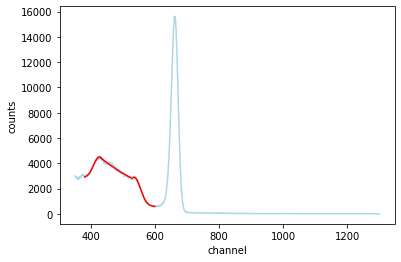

In [43]:
idea1 = xarrcs1a + xarrcs1b + xarrcs1c
idea2 = yarrcs1a + yarrcs1b + yarrcs1c

#plt.plot(idea1,idea2,color="pink")
plt.plot(peakc_cs1,peaki_cs1,color="lightblue");
plt.plot(xarrcs1a[:1800],yarrcs1a[:1800],"red")
plt.plot(xarrcs1b[100:],yarrcs1b[100:],"red")
plt.plot(xarrcs1c[:1800],yarrcs1c[:1800],"red")
plt.xlabel('channel');
plt.ylabel('counts');

In [44]:
def line3(x,a1,mu1,sig1, a2,mu2,sig2,c, a,b):
    y1 = 1 + a1*e**((-(x-mu1)**2)/(2*sig1**2))
    y2 = 1 + a2*e**((-(x-mu2)**2)/(2*sig2**2))
    y3 = a*(b**x)
    y = y1 + y2 + y3 + c
    return y

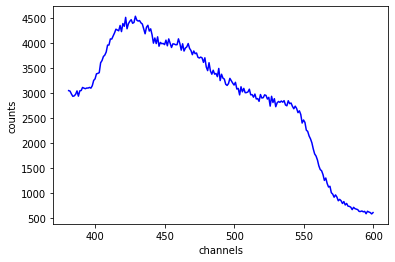

In [45]:
loc_cs1u = np.where((cal1 >= 380 ) & (cal1 <= 600))

peakc_cs1u = cal1[loc_cs1u] 
peaki_cs1u = Cs1[loc_cs1u]


plt.plot(peakc_cs1u,peaki_cs1u,color="blue");
plt.xlabel('channels');
plt.ylabel('counts');

/Users/alexh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.
/Users/alexh/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


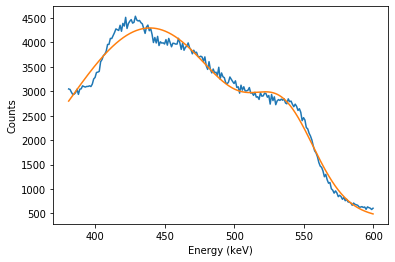

In [46]:
pcs1u= np.array([4000,mcs1a,sd3cs1a,3000,mcs1b,sd3cs1b,5000,1,1])
coeffcs1u, covar_matrixcs1u = curve_fit(line3, peakc_cs1u, peaki_cs1u,p0=pcs1u)
xarrcs1u=np.linspace(np.min(peakc_cs1u),np.max(peakc_cs1u),2000)
yarrcs1u=line3(xarrcs1u,*coeffcs1u)

#plt.plot(peakc_cs1,peaki_cs1,color="blue");
plt.plot(peakc_cs1u,peaki_cs1u)
plt.plot(xarrcs1u,yarrcs1u)
plt.xlabel('Energy (keV)');
plt.ylabel('Counts');

The center is 661.596 keV


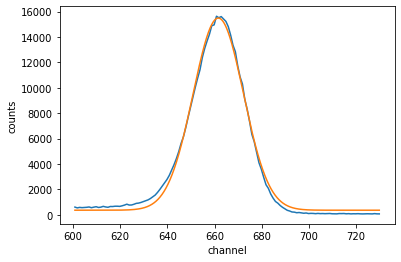

In [47]:
mcs1d = np.mean(peakc_cs1d)
sd3cs1d = np.std(peakc_cs1d)

pcs1d= np.array([16000,mcs1d,sd3cs1d,1000])
coeffcs1d, covar_matrixcs1d = curve_fit(line1, peakc_cs1d, peaki_cs1d,p0=pcs1d)
xarrcs1d=np.linspace(np.min(peakc_cs1d),np.max(peakc_cs1d),2000)
yarrcs1d=line1(xarrcs1d,*coeffcs1d)

#plt.plot(peakc_cs1,peaki_cs1,color="blue");
plt.plot(peakc_cs1d,peaki_cs1d)
plt.plot(xarrcs1d,yarrcs1d)
plt.xlabel('channel');
plt.ylabel('counts');
print("The center is",round(coeffcs1d[1],3),"keV")

In [48]:
def line5(x,a1,mu1,sig1, a2,mu2,sig2, a3,mu3,sig3, c, a,b):
    y1 = 1 + a1*e**((-(x-mu1)**2)/(2*sig1**2))
    y2 = 1 + a2*e**((-(x-mu2)**2)/(2*sig2**2))
    y3 = 1 + a3*e**((-(x-mu3)**2)/(2*sig3**2))
    y4 = a*(b**x)
    y = y1 + y2 + y3 + y4 + c
    return y

/Users/alexh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """


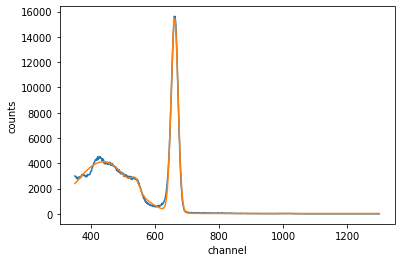

In [49]:
pcs1t= np.array([4000,mcs1a,sd3cs1a,3000,mcs1b,sd3cs1b,16000,mcs1d,sd3cs1d,5000,1,1])
coeffcs1t, covar_matrixcs1t = curve_fit(line5, peakc_cs1, peaki_cs1,p0=pcs1t)
xarrcs1t=np.linspace(np.min(peakc_cs1),np.max(peakc_cs1),950)
yarrcs1t=line5(xarrcs1t,*coeffcs1t)

#plt.plot(peakc_cs1,peaki_cs1,color="blue");
plt.plot(peakc_cs1,peaki_cs1)
plt.plot(xarrcs1t,yarrcs1t)
plt.xlabel('channel');
plt.ylabel('counts');

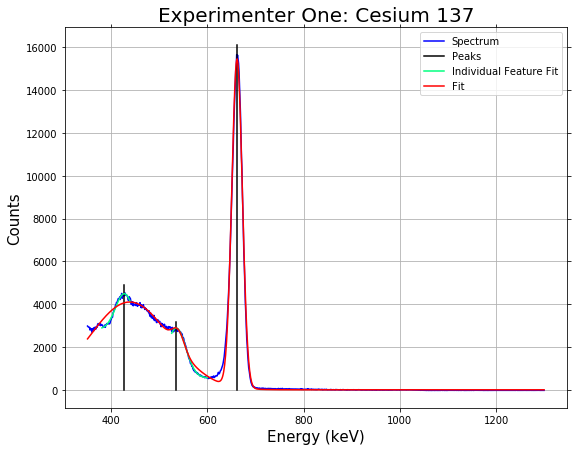

In [50]:
fig8,ax8 =plt.subplots(figsize=(9,7))

countcs1a = (0,4900)
encs1a = (coeffcs1a[1],coeffcs1a[1])

countcs1b = (0,3200)
encs1b = (coeffcs1b[1],coeffcs1b[1])

countcs1d = (0,16100)
encs1d = (coeffcs1d[1],coeffcs1d[1])

ax8.plot(peakc_cs1,peaki_cs1,color='blue',label="Spectrum")

ax8.plot(encs1a,countcs1a,color='black',Label="Peaks")
ax8.plot(encs1b,countcs1b,color='black')
ax8.plot(encs1d,countcs1d,color='black')

ax8.plot(xarrcs1a,yarrcs1a,color='springgreen',label="Individual Feature Fit")
ax8.plot(xarrcs1b,yarrcs1b,color='springgreen')
ax8.plot(xarrcs1t,yarrcs1t,color='red',label="Fit")
#ax2.plot(xarr1, yarr1, color = "red",label="guassian fit of photopeak")
#ax2.plot(xc1, yc1, label = "photopeak center")

ax8.set_xlabel('Energy (keV)',fontsize=15)
ax8.set_ylabel('Counts',fontsize=15)

ax8.tick_params(axis='both',which='minor',direction='in')
ax8.tick_params(top=True,right=True)
ax8.tick_params(which='minor',top=True,right=True)
ax8.grid()

ax8.legend()
ax8.set_title("Experimenter One: Cesium 137", fontsize = 20)

#plt.legend()
plt.show()

## Fit for Experimenter Two: Cesium 137

In [51]:
loc_cs2 = np.where((cal2 >= 350 ) & (cal2 <= 1300))

loc_cs2a = np.where((cal2 >= 380 ) & (cal2 <= 440))
loc_cs2b = np.where((cal2 >= 525 ) & (cal2 <= 600))
loc_cs2c = np.where((cal2 >= 430 ) & (cal2 <= 535))
loc_cs2d = np.where((cal2 >= 600 ) & (cal2 <= 730))

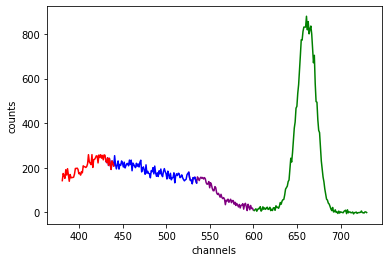

In [52]:
peakc_cs2 = cal2[loc_cs2] 
peaki_cs2 = Cs2[loc_cs2]

peakc_cs2a = cal2[loc_cs2a] 
peaki_cs2a = Cs2[loc_cs2a]

peakc_cs2b = cal2[loc_cs2b] 
peaki_cs2b = Cs2[loc_cs2b]

peakc_cs2c = cal2[loc_cs2c] 
peaki_cs2c = Cs2[loc_cs2c]

peakc_cs2d = cal2[loc_cs2d] 
peaki_cs2d = Cs2[loc_cs2d]


#plt.plot(peakc_cs2,peaki_cs2,color="black");
plt.plot(peakc_cs2b,peaki_cs2b,color="purple");
plt.plot(peakc_cs2c,peaki_cs2c,color="blue");
plt.plot(peakc_cs2d,peaki_cs2d,color="green");
plt.plot(peakc_cs2a,peaki_cs2a,color="red");

plt.xlabel('channels');
plt.ylabel('counts');

The center is 423.854 keV


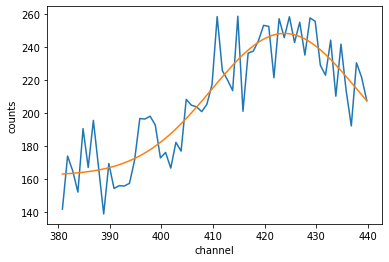

In [53]:
mcs2a = np.mean(peakc_cs2a)
sd3cs2a = np.std(peakc_cs2a)

pcs2a= np.array([4000,mcs2a,sd3cs2a,1000])
coeffcs2a, covar_matrixcs2a = curve_fit(line1, peakc_cs2a, peaki_cs2a,p0=pcs2a)
xarrcs2a=np.linspace(np.min(peakc_cs2a),np.max(peakc_cs2a),2000)
yarrcs2a=line1(xarrcs2a,*coeffcs2a)

#plt.plot(peakc_cs2,peaki_cs2,color="blue");
plt.plot(peakc_cs2a,peaki_cs2a)
plt.plot(xarrcs2a,yarrcs2a)
plt.xlabel('channel');
plt.ylabel('counts');
print("The center is",round(coeffcs2a[1],3),"keV")

The center is 533.732 keV


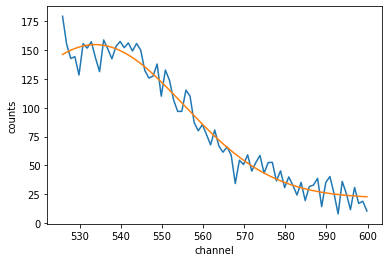

In [54]:
mcs2b = np.mean(peakc_cs2b)
sd3cs2b = np.std(peakc_cs2b)

pcs2b= np.array([4000,mcs2b,sd3cs2b,1000])
coeffcs2b, covar_matrixcs2b = curve_fit(line1, peakc_cs2b, peaki_cs2b,p0=pcs2b)
xarrcs2b=np.linspace(np.min(peakc_cs2b),np.max(peakc_cs2b),2000)
yarrcs2b=line1(xarrcs2b,*coeffcs2b)

#plt.plot(peakc_cs1,peaki_cs1,color="blue");
plt.plot(peakc_cs2b,peaki_cs2b)
plt.plot(xarrcs2b,yarrcs2b)
plt.xlabel('channel');
plt.ylabel('counts');
print("The center is",round(coeffcs2b[1],3),"keV")

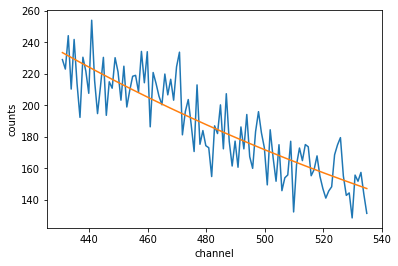

In [55]:
mcs2c = np.mean(peakc_cs2c)
sd3cs2c = np.std(peakc_cs2c)

psom2 = np.array([1,1])
coeffcs2c, covar_matrixcs2c = curve_fit(line2, peakc_cs2c, peaki_cs2c,p0=psom2)
xarrcs2c=np.linspace(np.min(peakc_cs2c),np.max(peakc_cs2c),2000)
yarrcs2c=line2(xarrcs2c,*coeffcs2c)

#plt.plot(peakc_cs1,peaki_cs1,color="blue");
plt.plot(peakc_cs2c,peaki_cs2c)
plt.plot(xarrcs2c,yarrcs2c)
plt.xlabel('channel');
plt.ylabel('counts');

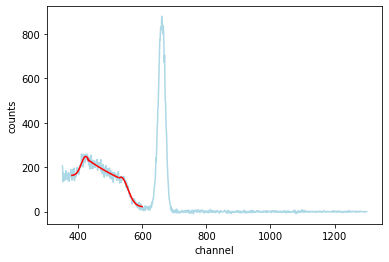

In [56]:
plt.plot(peakc_cs2,peaki_cs2,color="lightblue");
plt.plot(xarrcs2a[:1800],yarrcs2a[:1800],"red")
plt.plot(xarrcs2b[100:],yarrcs2b[100:],"red")
plt.plot(xarrcs2c[:1800],yarrcs2c[:1800],"red")
plt.xlabel('channel');
plt.ylabel('counts');

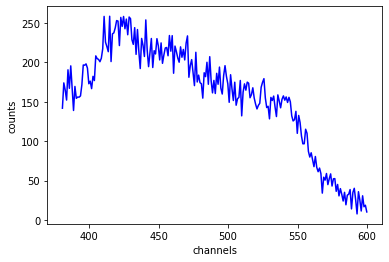

In [57]:
loc_cs2u = np.where((cal2 >= 380 ) & (cal2 <= 600))

peakc_cs2u = cal2[loc_cs2u] 
peaki_cs2u = Cs2[loc_cs2u]


plt.plot(peakc_cs2u,peaki_cs2u,color="blue");
plt.xlabel('channels');
plt.ylabel('counts');

/Users/alexh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


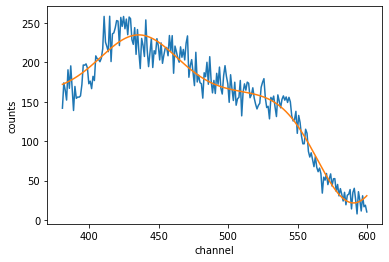

In [58]:
pcs2u= np.array([4000,mcs2a,sd3cs2a,3000,mcs2b,sd3cs2b,5000,1,1])
coeffcs2u, covar_matrixcs2u = curve_fit(line3, peakc_cs2u, peaki_cs2u,p0=pcs2u)
xarrcs2u=np.linspace(np.min(peakc_cs2u),np.max(peakc_cs2u),2000)
yarrcs2u=line3(xarrcs2u,*coeffcs2u)

#plt.plot(peakc_cs1,peaki_cs1,color="blue");
plt.plot(peakc_cs2u,peaki_cs2u)
plt.plot(xarrcs2u,yarrcs2u)
plt.xlabel('channel');
plt.ylabel('counts');

The center is 661.023 keV


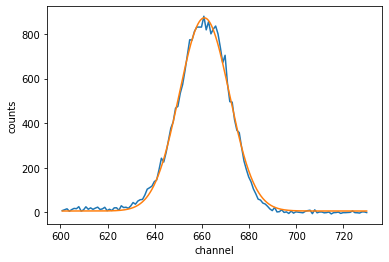

In [59]:
mcs2d = np.mean(peakc_cs2d)
sd3cs2d = np.std(peakc_cs2d)

pcs2d= np.array([16000,mcs2d,sd3cs2d,1000])
coeffcs2d, covar_matrixcs1d = curve_fit(line1, peakc_cs2d, peaki_cs2d,p0=pcs2d)
xarrcs2d=np.linspace(np.min(peakc_cs2d),np.max(peakc_cs2d),2000)
yarrcs2d=line1(xarrcs2d,*coeffcs2d)

#plt.plot(peakc_cs1,peaki_cs1,color="blue");
plt.plot(peakc_cs2d,peaki_cs2d)
plt.plot(xarrcs2d,yarrcs2d)
plt.xlabel('channel');
plt.ylabel('counts');
print("The center is",round(coeffcs2d[1],3),"keV")

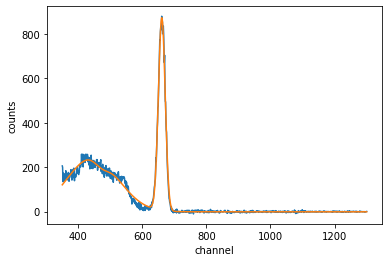

In [60]:
pcs2t= np.array([4000,mcs2a,sd3cs2a,3000,mcs2b,sd3cs2b,16000,mcs2d,sd3cs2d,1000,1,1])
coeffcs2t, covar_matrixcs2t = curve_fit(line5, peakc_cs2, peaki_cs2,p0=pcs2t)
xarrcs2t=np.linspace(np.min(peakc_cs2),np.max(peakc_cs2),950)
yarrcs2t=line5(xarrcs2t,*coeffcs2t)

#plt.plot(peakc_cs1,peaki_cs1,color="blue");
plt.plot(peakc_cs2,peaki_cs2)
plt.plot(xarrcs2t,yarrcs2t)
plt.xlabel('channel');
plt.ylabel('counts');

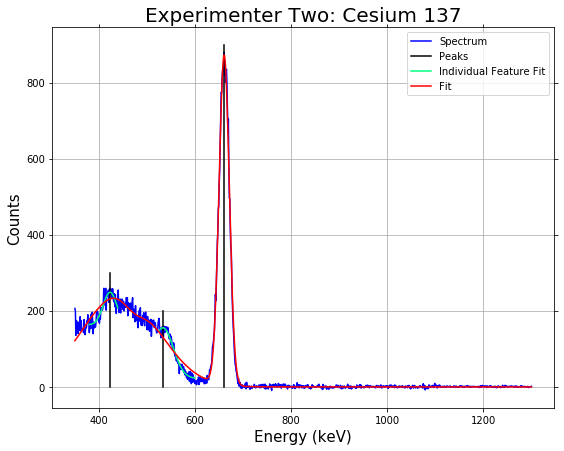

In [61]:
fig8,ax8 =plt.subplots(figsize=(9,7))

countcs2a = (0,300)
encs2a = (coeffcs2a[1],coeffcs2a[1])

countcs2b = (0,200)
encs2b = (coeffcs2b[1],coeffcs2b[1])

countcs2d = (0,900)
encs2d = (coeffcs2d[1],coeffcs2d[1])

ax8.plot(peakc_cs2,peaki_cs2,color='blue',label="Spectrum")

ax8.plot(encs2a,countcs2a,color='black',label="Peaks")
ax8.plot(encs2b,countcs2b,color='black')
ax8.plot(encs2d,countcs2d,color='black')

ax8.plot(xarrcs2a,yarrcs2a,color='springgreen')
ax8.plot(xarrcs2b,yarrcs2b,color='springgreen',label="Individual Feature Fit")
ax8.plot(xarrcs2t,yarrcs2t,color='red',label="Fit")

ax8.set_xlabel('Energy (keV)',fontsize=15)
ax8.set_ylabel('Counts',fontsize=15)

ax8.tick_params(axis='both',which='minor',direction='in')
ax8.tick_params(top=True,right=True)
ax8.tick_params(which='minor',top=True,right=True)
ax8.grid()
ax8.legend()

ax8.set_title("Experimenter Two: Cesium 137", fontsize = 20)

#plt.legend()
plt.show()

## Fit for Experimenter One: Cobalt 60

In [62]:
loc_co1 = np.where((cal3 >= 100 ) & (cal3 <= 1800))

loc_co1a = np.where((cal3 >= 155 ) & (cal3 <= 240))
loc_co1b = np.where((cal3 >= 260 ) & (cal3 <= 400))
loc_co1c = np.where((cal3 >= 820 ) & (cal3 <= 1000))
loc_co1d = np.where((cal3 >= 1100 ) & (cal3 <= 1250))
loc_co1e = np.where((cal3 >= 1250 ) & (cal3 <= 1450))

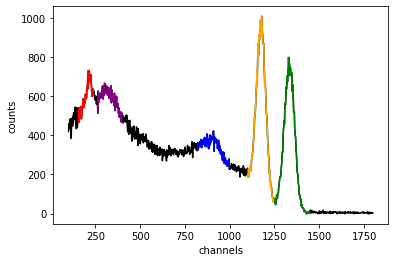

In [63]:
peakc_co1 = cal3[loc_co1] 
peaki_co1 = Co1[loc_co1]

peakc_co1a = cal3[loc_co1a] 
peaki_co1a = Co1[loc_co1a]

peakc_co1b = cal3[loc_co1b] 
peaki_co1b = Co1[loc_co1b]

peakc_co1c = cal3[loc_co1c] 
peaki_co1c = Co1[loc_co1c]

peakc_co1d = cal3[loc_co1d] 
peaki_co1d = Co1[loc_co1d]

peakc_co1e = cal3[loc_co1e] 
peaki_co1e = Co1[loc_co1e]



plt.plot(peakc_co1,peaki_co1,color="black");
plt.plot(peakc_co1a,peaki_co1a,color="red");
plt.plot(peakc_co1b,peaki_co1b,color="purple");
plt.plot(peakc_co1c,peaki_co1c,color="blue");
plt.plot(peakc_co1d,peaki_co1d,color="orange");
plt.plot(peakc_co1e,peaki_co1e,color="green");

plt.xlabel('channels');
plt.ylabel('counts');

The center is 217.425 keV


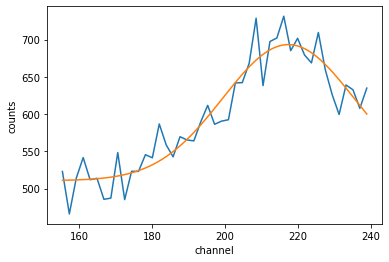

In [64]:
mco1a = np.mean(peakc_co1a)
sd3co1a = np.std(peakc_co1a)

pco1a= np.array([4000,mco1a,sd3co1a,1000])
coeffco1a, covar_matrixco1a = curve_fit(line1, peakc_co1a, peaki_co1a,p0=pco1a)
xarrco1a=np.linspace(np.min(peakc_co1a),np.max(peakc_co1a),2000)
yarrco1a=line1(xarrco1a,*coeffco1a)

#plt.plot(peakc_cs1,peaki_cs1,color="blue");
plt.plot(peakc_co1a,peaki_co1a)
plt.plot(xarrco1a,yarrco1a)
plt.xlabel('channel');
plt.ylabel('counts');
print("The center is",round(coeffco1a[1],3),"keV")

The center is 309.312 keV


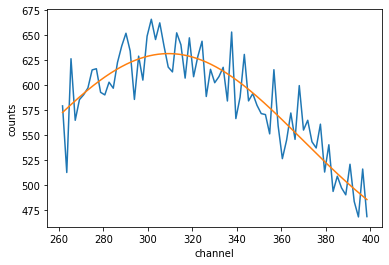

In [65]:
mco1b = np.mean(peakc_co1b)
sd3co1b = np.std(peakc_co1b)

pco1b= np.array([4000,mco1b,sd3co1b,1000])
coeffco1b, covar_matrixco1b = curve_fit(line1, peakc_co1b, peaki_co1b,p0=pco1b)
xarrco1b=np.linspace(np.min(peakc_co1b),np.max(peakc_co1b),2000)
yarrco1b=line1(xarrco1b,*coeffco1b)

plt.plot(peakc_co1b,peaki_co1b)
plt.plot(xarrco1b,yarrco1b)
plt.xlabel('channel');
plt.ylabel('counts');
print("The center is",round(coeffco1b[1],3),"keV")

The center is 881.705 keV


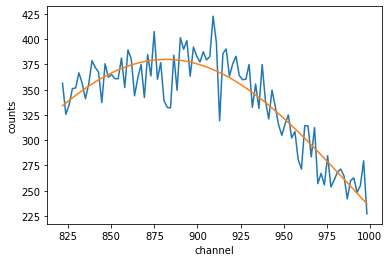

In [66]:
mco1c = np.mean(peakc_co1c)
sd3co1c = np.std(peakc_co1c)

pco1c= np.array([400,mco1c,sd3co1c,100])
coeffco1c, covar_matrixco1c = curve_fit(line1, peakc_co1c, peaki_co1c,p0=pco1c)
xarrco1c=np.linspace(np.min(peakc_co1c),np.max(peakc_co1c),2000)
yarrco1c=line1(xarrco1c,*coeffco1c)

plt.plot(peakc_co1c,peaki_co1c)
plt.plot(xarrco1c,yarrco1c)
plt.xlabel('channel');
plt.ylabel('counts');
print("The center is",round(coeffco1c[1],3),"keV")

The center is 1173.045 keV


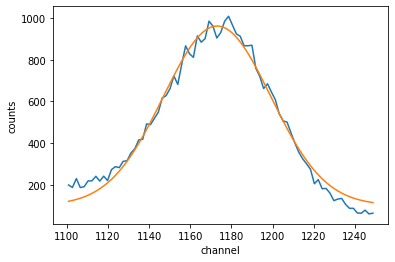

In [67]:
mco1d = np.mean(peakc_co1d)
sd3co1d = np.std(peakc_co1d)

pco1d= np.array([400,mco1d,sd3co1d,100])
coeffco1d, covar_matrixco1d = curve_fit(line1, peakc_co1d, peaki_co1d,p0=pco1d)
xarrco1d=np.linspace(np.min(peakc_co1d),np.max(peakc_co1d),2000)
yarrco1d=line1(xarrco1d,*coeffco1d)

plt.plot(peakc_co1d,peaki_co1d)
plt.plot(xarrco1d,yarrco1d)
plt.xlabel('channel');
plt.ylabel('counts');
print("The center is",round(coeffco1d[1],3),"keV")

The center is 1332.518 keV


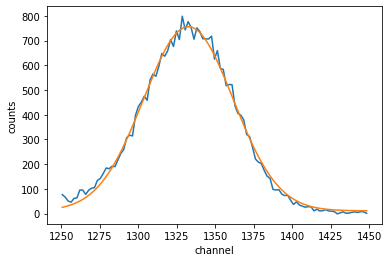

In [68]:
mco1e = np.mean(peakc_co1e)
sd3co1e = np.std(peakc_co1e)

pco1e= np.array([400,mco1e,sd3co1e,100])
coeffco1e, covar_matrixco1e = curve_fit(line1, peakc_co1e, peaki_co1e,p0=pco1e)
xarrco1e=np.linspace(np.min(peakc_co1e),np.max(peakc_co1e),2000)
yarrco1e=line1(xarrco1e,*coeffco1e)

plt.plot(peakc_co1e,peaki_co1e)
plt.plot(xarrco1e,yarrco1e)
plt.xlabel('channel');
plt.ylabel('counts');
print("The center is",round(coeffco1e[1],3),"keV")

In [69]:
def line6(x, a1,mu1,sig1, a2,mu2,sig2 ,a3,mu3,sig3, a4,mu4,sig4, a5,mu5,sig5, a,b,c):
    y1 = 1 + a1*e**((-(x-mu1)**2)/(2*sig1**2))
    y2 = 1 + a2*e**((-(x-mu2)**2)/(2*sig2**2))
    y3 = 1 + a3*e**((-(x-mu3)**2)/(2*sig3**2))
    y4 = 1 + a4*e**((-(x-mu4)**2)/(2*sig4**2))
    y5 = 1 + a5*e**((-(x-mu5)**2)/(2*sig5**2))
    y6 = a*(b**x)
    
    y = y1 + y2 + y3 + y4 + y5 + y6 + c
    return y

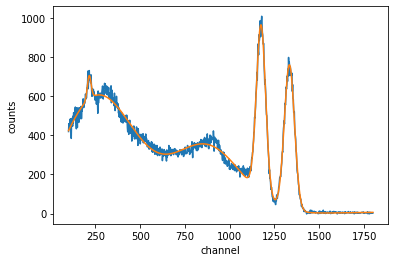

In [70]:
mco1t = np.mean(peakc_co1)
sd3co1t = np.std(peakc_co1)

pco1t= np.array([600,mco1a,sd3co1a, 600,mco1b,sd3co1b, 400,mco1c,sd3co1c, 1000,mco1d,sd3co1d, 800,mco1e,sd3co1e,40,1,10])
coeffco1t, covar_matrixco1t = curve_fit(line6, peakc_co1, peaki_co1,p0=pco1t)
xarrco1t=np.linspace(np.min(peakc_co1),np.max(peakc_co1),896)
yarrco1t=line6(xarrco1t,*coeffco1t)

plt.plot(peakc_co1,peaki_co1)
plt.plot(xarrco1t,yarrco1t)
plt.xlabel('channel');
plt.ylabel('counts');

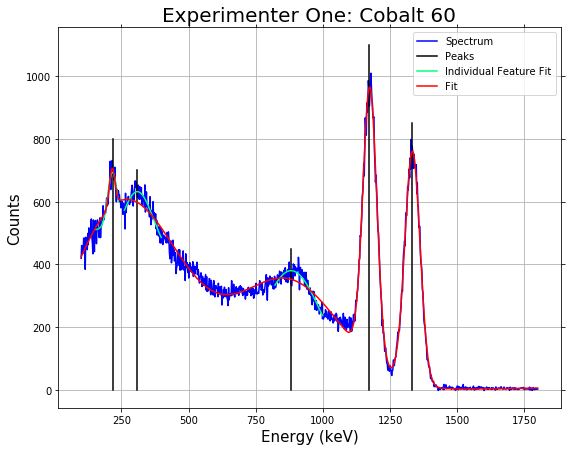

In [71]:
fig8,ax8 =plt.subplots(figsize=(9,7))

countco1a = (0,800)
enco1a = (coeffco1a[1],coeffco1a[1])

countco1b = (0,700)
enco1b = (coeffco1b[1],coeffco1b[1])

countco1c = (0,450)
enco1c = (coeffco1c[1],coeffco1c[1])

countco1d = (0,1100)
enco1d = (coeffco1d[1],coeffco1d[1])

countco1e = (0,850)
enco1e = (coeffco1e[1],coeffco1e[1])

ax8.plot(peakc_co1,peaki_co1,color='blue',label="Spectrum")

ax8.plot(enco1a,countco1a,color='black',label="Peaks")
ax8.plot(enco1b,countco1b,color='black')
ax8.plot(enco1c,countco1c,color='black')
ax8.plot(enco1d,countco1d,color='black')
ax8.plot(enco1e,countco1e,color='black')

ax8.plot(xarrco1a,yarrco1a,color='springgreen',label="Individual Feature Fit")
ax8.plot(xarrco1b,yarrco1b,color='springgreen')
ax8.plot(xarrco1c,yarrco1c,color='springgreen')
ax8.plot(xarrco1t,yarrco1t,color='red',label="Fit")
#ax2.plot(xarr1, yarr1, color = "red",label="guassian fit of photopeak")
#ax2.plot(xc1, yc1, label = "photopeak center")

ax8.set_xlabel('Energy (keV)',fontsize=15)
ax8.set_ylabel('Counts',fontsize=15)

ax8.tick_params(axis='both',which='minor',direction='in')
ax8.tick_params(top=True,right=True)
ax8.tick_params(which='minor',top=True,right=True)
ax8.grid()

ax8.set_title("Experimenter One: Cobalt 60", fontsize = 20)
plt.legend()
#plt.legend()
plt.show()

## Fit for Experimenter Two: Cobalt 60

In [72]:
loc_co2 = np.where((cal4 >= 100 ) & (cal4 <= 1800))

loc_co2a = np.where((cal4 >= 155 ) & (cal4 <= 240))
loc_co2b = np.where((cal4 >= 260 ) & (cal4 <= 400))
loc_co2c = np.where((cal4 >= 820 ) & (cal4 <= 1000))
loc_co2d = np.where((cal4 >= 1100 ) & (cal4 <= 1250))
loc_co2e = np.where((cal4 >= 1250 ) & (cal4 <= 1450))

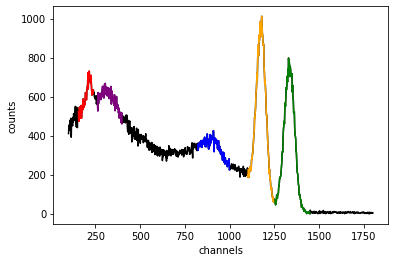

In [73]:
peakc_co2 = cal4[loc_co2] 
peaki_co2 = Co2[loc_co2]

peakc_co2a = cal4[loc_co2a] 
peaki_co2a = Co2[loc_co1a]

peakc_co2b = cal4[loc_co2b] 
peaki_co2b = Co2[loc_co2b]

peakc_co2c = cal4[loc_co2c] 
peaki_co2c = Co2[loc_co2c]

peakc_co2d = cal4[loc_co2d] 
peaki_co2d = Co2[loc_co2d]

peakc_co2e = cal4[loc_co2e] 
peaki_co2e = Co2[loc_co2e]



plt.plot(peakc_co2,peaki_co2,color="black");
plt.plot(peakc_co2a,peaki_co2a,color="red");
plt.plot(peakc_co2b,peaki_co2b,color="purple");
plt.plot(peakc_co2c,peaki_co2c,color="blue");
plt.plot(peakc_co2d,peaki_co2d,color="orange");
plt.plot(peakc_co2e,peaki_co2e,color="green");

plt.xlabel('channels');
plt.ylabel('counts');

The center is 217.513 keV


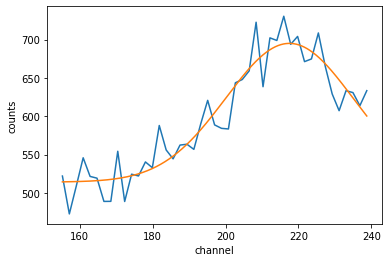

In [74]:
mco2a = np.mean(peakc_co2a)
sd3co2a = np.std(peakc_co2a)

pco2a= np.array([4000,mco2a,sd3co2a,1000])
coeffco2a, covar_matrixco2a = curve_fit(line1, peakc_co2a, peaki_co2a,p0=pco2a)
xarrco2a=np.linspace(np.min(peakc_co2a),np.max(peakc_co2a),2000)
yarrco2a=line1(xarrco2a,*coeffco2a)

#plt.plot(peakc_cs1,peaki_cs1,color="blue");
plt.plot(peakc_co2a,peaki_co2a)
plt.plot(xarrco2a,yarrco2a)
plt.xlabel('channel');
plt.ylabel('counts');
print("The center is",round(coeffco2a[1],3),"keV")

The center is 309.12 keV


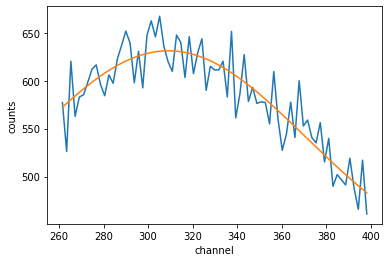

In [75]:
mco2b = np.mean(peakc_co2b)
sd3co2b = np.std(peakc_co2b)

pco2b= np.array([4000,mco2b,sd3co2b,1000])
coeffco2b, covar_matrixco2b = curve_fit(line1, peakc_co2b, peaki_co2b,p0=pco2b)
xarrco2b=np.linspace(np.min(peakc_co2b),np.max(peakc_co2b),2000)
yarrco2b=line1(xarrco2b,*coeffco2b)

#plt.plot(peakc_cs1,peaki_cs1,color="blue");
plt.plot(peakc_co2b,peaki_co2b)
plt.plot(xarrco2b,yarrco2b)
plt.xlabel('channel');
plt.ylabel('counts');
print("The center is",round(coeffco2b[1],3),"keV")

The center is 881.843 keV


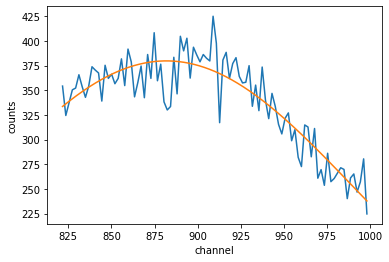

In [76]:
mco2c = np.mean(peakc_co2c)
sd3co2c = np.std(peakc_co2c)

pco2c= np.array([4000,mco2c,sd3co2c,1000])
coeffco2c, covar_matrixco2c = curve_fit(line1, peakc_co2c, peaki_co2c,p0=pco2c)
xarrco2c=np.linspace(np.min(peakc_co2c),np.max(peakc_co2c),2000)
yarrco2c=line1(xarrco2c,*coeffco2c)

#plt.plot(peakc_cs1,peaki_cs1,color="blue");
plt.plot(peakc_co2c,peaki_co2c)
plt.plot(xarrco2c,yarrco2c)
plt.xlabel('channel');
plt.ylabel('counts');
print("The center is",round(coeffco2c[1],3),"keV")

The center is 1173.048 keV


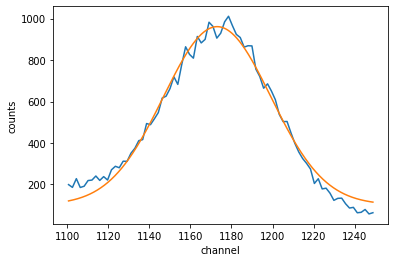

In [77]:
mco2d = np.mean(peakc_co2d)
sd3co2d = np.std(peakc_co2d)

pco2d= np.array([4000,mco2d,sd3co2d,1000])
coeffco2d, covar_matrixco2d = curve_fit(line1, peakc_co2d, peaki_co2d,p0=pco2d)
xarrco2d=np.linspace(np.min(peakc_co2d),np.max(peakc_co2d),2000)
yarrco2d=line1(xarrco2d,*coeffco2d)

#plt.plot(peakc_cs1,peaki_cs1,color="blue");
plt.plot(peakc_co2d,peaki_co2d)
plt.plot(xarrco2d,yarrco2d)
plt.xlabel('channel');
plt.ylabel('counts');
print("The center is",round(coeffco2d[1],3),"keV")

The center is 1332.52 keV


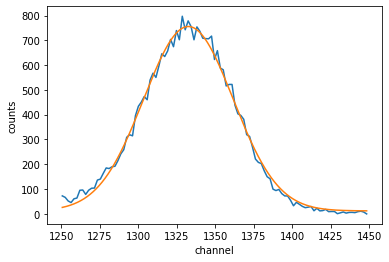

In [78]:
mco2e = np.mean(peakc_co2e)
sd3co2e = np.std(peakc_co2e)

pco2e= np.array([4000,mco2e,sd3co2e,1000])
coeffco2e, covar_matrixco2e = curve_fit(line1, peakc_co2e, peaki_co2e,p0=pco2e)
xarrco2e=np.linspace(np.min(peakc_co2e),np.max(peakc_co2e),2000)
yarrco2e=line1(xarrco2e,*coeffco2e)

#plt.plot(peakc_cs1,peaki_cs1,color="blue");
plt.plot(peakc_co2e,peaki_co2e)
plt.plot(xarrco2e,yarrco2e)
plt.xlabel('channel');
plt.ylabel('counts');
print("The center is",round(coeffco2e[1],3),"keV")

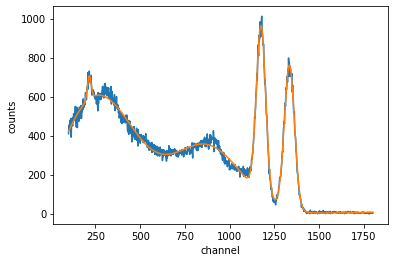

In [79]:
mco2t = np.mean(peakc_co2)
sd3co2t = np.std(peakc_co2)

pco2t= np.array([600,mco2a,sd3co2a, 600,mco2b,sd3co2b, 400,mco1c,sd3co2c, 1000,mco2d,sd3co2d, 800,mco2e,sd3co2e,40,1,10])
coeffco2t, covar_matrixco2t = curve_fit(line6, peakc_co2, peaki_co2,p0=pco2t)
xarrco2t=np.linspace(np.min(peakc_co2),np.max(peakc_co2),896)
yarrco2t=line6(xarrco2t,*coeffco2t)

plt.plot(peakc_co2,peaki_co2)
plt.plot(xarrco2t,yarrco2t)
plt.xlabel('channel');
plt.ylabel('counts');

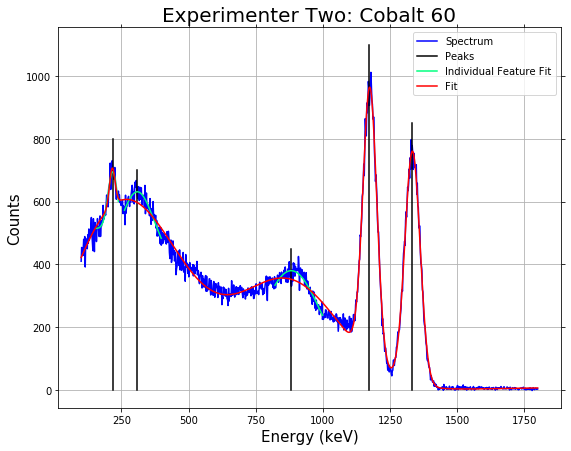

In [80]:
fig8,ax8 =plt.subplots(figsize=(9,7))

countco2a = (0,800)
enco2a = (coeffco2a[1],coeffco2a[1])

countco2b = (0,700)
enco2b = (coeffco2b[1],coeffco2b[1])

countco2c = (0,450)
enco2c = (coeffco2c[1],coeffco2c[1])

countco2d = (0,1100)
enco2d = (coeffco2d[1],coeffco2d[1])

countco2e = (0,850)
enco2e = (coeffco2e[1],coeffco2e[1])

ax8.plot(peakc_co2,peaki_co2,color='blue',label="Spectrum")

ax8.plot(enco2a,countco2a,color='black',label="Peaks")
ax8.plot(enco2b,countco2b,color='black')
ax8.plot(enco2c,countco2c,color='black')
ax8.plot(enco2d,countco2d,color='black')
ax8.plot(enco2e,countco2e,color='black')

ax8.plot(xarrco2a,yarrco2a,color='springgreen', label = "Individual Feature Fit")
ax8.plot(xarrco2b,yarrco2b,color='springgreen')
ax8.plot(xarrco2c,yarrco2c,color='springgreen')
ax8.plot(xarrco2t,yarrco2t,color='red',label="Fit")
#ax2.plot(xarr1, yarr1, color = "red",label="guassian fit of photopeak")
#ax2.plot(xc1, yc1, label = "photopeak center")

ax8.set_xlabel('Energy (keV)',fontsize=15)
ax8.set_ylabel('Counts',fontsize=15)

ax8.tick_params(axis='both',which='minor',direction='in')
ax8.tick_params(top=True,right=True)
ax8.tick_params(which='minor',top=True,right=True)
ax8.grid()
ax8.legend()
ax8.set_title("Experimenter Two: Cobalt 60", fontsize = 20)

#plt.legend()
plt.show()

## Radioactivity

In [81]:
lam_cs1 = 0.0231
lam_cs2 = 0.0230
lam_co1 = 0.1315
lam_co2 = 0.1315

A0_cs1 = 5
A0_cs2 = 0.25 #** mci
A0_co1 = 1 
A0_co2 = 1 #** mci

#cesium
#10/01/14
#04/15/16
#cobalt
#04/15/15
#04/01/16

#cesium
#12/14  **
#06/16
#cobalt
#07/16 #after testing
#01/15 **

Cs1d = 4.75
Cs2d = 1.38
Co1d = 0.29
Co2d = 1.28

In [82]:
from math import e

r1 = A0_cs1*(e**(-lam_cs1*Cs1d))
print(round(r1,4))

r2 = A0_cs2*(e**(-lam_cs2*Cs2d))
print(round(r2,4))

r3 = A0_co1*(e**(-lam_co1*Co1d))
print(round(r3,4))

r4 = A0_co2*(e**(-lam_co2*Co2d))
print(round(r4,4))

4.4804
0.2422
0.9626
0.8451


## Propogation of Error

In [83]:
def prp(l,t,a,std1,std2):
        y1 = np.sqrt(((e**(-l*t))**2)*(std1**2))
        y2 = np.sqrt(((-a*l*e**(-l*t))**2)*(std1**2))
        y3 = y1+y2
        return y3

In [84]:
p1= prp(lam_cs1,Cs1d,A0_cs1,1,0.083)
print(p1)

p2= prp(lam_cs2,Cs2d,A0_cs2,0.05,0.083)
print(p2)

p3= prp(lam_co1,Co1d,A0_co1,0.2,0.083)
print(p3)

p4= prp(lam_co2,Co2d,A0_co2,0.2,0.083)
print(p4)

p5= prp(lam_co2,Co2d,A0_co2,0.2,700)
print(p5)

0.9995778240318139
0.048716439374071954
0.21783252914715537
0.191242365439544
0.191242365439544


## Chi Squared

In [85]:
from scipy import stats

chi1 = scipy.stats.chisquare(peaki_cs1,yarrcs1t)
chi2 = scipy.stats.chisquare(peaki_cs2,yarrcs2t)
chi3 = scipy.stats.chisquare(peaki_co1,yarrco1t)
chi4 = scipy.stats.chisquare(peaki_co2,yarrco2t)

print(chi1)
print(chi2)
print(chi3)
print(chi4)

#reduced with dof=18
print(26233.26/18)
print(-5361.960/18)
print(1799.23/18)
print(1808.278/18)

Power_divergenceResult(statistic=26233.26209052986, pvalue=0.0)
Power_divergenceResult(statistic=-5361.960777425131, pvalue=1.0)
Power_divergenceResult(statistic=1799.2319651568428, pvalue=4.2491256172623826e-63)
Power_divergenceResult(statistic=1808.2783647913784, pvalue=4.30839570414836e-64)
1457.4033333333332
-297.88666666666666
99.95722222222223
100.45988888888888


## Background Fit

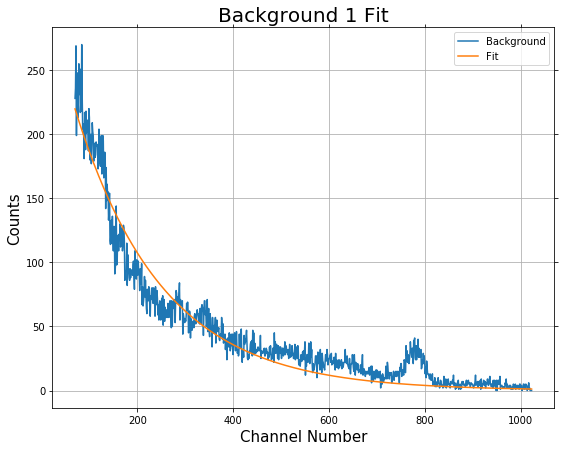

In [86]:
loc_bk = np.where((channel1 >= 70 ) & (channel1 <= 1300))

peakc_bk = channel1[loc_bk] 
peaki_bk = intensity1[loc_bk]

mbk = np.mean(peakc_bk)
sdbk = np.std(peakc_bk)

pbk = np.array([1,1])
coeffbk, covar_matrixbk = curve_fit(line2, peakc_bk, peaki_bk,p0=pbk)
xarrbk=np.linspace(np.min(peakc_bk),np.max(peakc_bk),954)
yarrbk=line2(xarrbk,*coeffbk)

fig1,ax1 =plt.subplots(figsize=(9,7))

ax1.plot(peakc_bk, peaki_bk,label="Background")
ax1.plot(xarrbk, yarrbk,label="Fit")

ax1.set_xlabel('Channel Number',fontsize=15)
ax1.set_ylabel('Counts',fontsize=15)

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)
ax1.grid()

ax1.set_title("Background 1 Fit", fontsize = 20)
plt.legend()
plt.show()

In [87]:
chibk = scipy.stats.chisquare(peaki_bk,yarrbk)

print(chibk)
print(10945.889/18)

Power_divergenceResult(statistic=10945.889063509354, pvalue=0.0)
608.1049444444444
